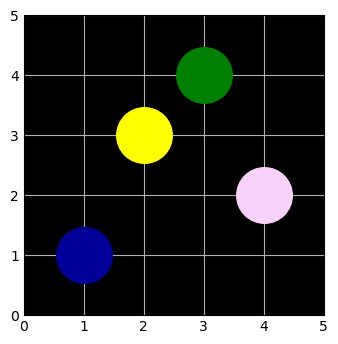

In [1]:
import matplotlib.pyplot as plt
from colorsys import rgb_to_hls, hls_to_rgb
from matplotlib.colors import to_rgb

class Pera:

    ásar = None
    perustærð = 40

    def __init__(self, x, y, litur):  # x og y eru á bilinu [0, 5]
                                      # litur er litanafn eða (r,g,b)
       self.RGB = to_rgb(litur)    # (r,g,b)
       self.birta = 50             # 50%
       h = Pera.ásar.plot(x, y, 'o', c=litur, ms=Pera.perustærð)
       self._mynd = h[0]           # litaður hringur sem táknar peruna

    def stilla_birtu(self, birta):  # birta í prósentum
       (r,g,b) = self.RGB
       (hue, _, saturation) = rgb_to_hls(r, g, b)
       self.birta = max(0, min(1, birta/100))
       self._mynd.set_color(hls_to_rgb(hue, self.birta, saturation))

    def breyta_lit(self, litur):
       self.RGB = to_rgb(litur)
       self.stilla_birtu(self.birta*100)

    def skila_birtu(self):     # í prósentum
       return self.birta*100

    @classmethod
    def undirbúa(cls, figure):
        ásar = figure.add_axes([0, 0, 1, 1])  # hnitakerfi fyllir upp í mynd
        ásar.axis([0, 5, 0, 5])               # 5x5 hnitakerfi
        ásar.set_facecolor('black')
        ásar.tick_params(length=0)
        ásar.grid()
        cls.ásar = ásar               # gefa klasabreytunni ásar gildi

figure = plt.figure(figsize = (3,3))
Pera.undirbúa(figure)
p1 = Pera(1, 1, 'red')
p2 = Pera(3, 4, 'green')
p3 = Pera(4, 2, 'violet')
p4 = Pera(2, 3, 'yellow')
p1.stilla_birtu(30)
p3.stilla_birtu(90)
p1.breyta_lit('blue')


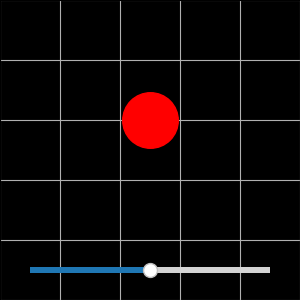

In [2]:
%matplotlib widget

def búa_til_sleða(p):
    from matplotlib.widgets import Slider
    def nota_dimmer(gildi):
        p.stilla_birtu(gildi)
    sleðaásar = plt.axes([0.1, 0.08, 0.8, 0.04], xticks=[], yticks=[])
    sleði = Slider(sleðaásar, '', valmin=0, valmax=100, valinit=50)
    sleði.on_changed(nota_dimmer)
    return sleði

f = plt.figure(figsize = (3,3))
Pera.undirbúa(f)
p = Pera(2.5, 3, 'red')
sleði = búa_til_sleða(p)